In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv(r"E:\OneDrive\Data Science Bootcamp 2023\Local\Core\repo_mayo_23\Entregas\Proyecto ML\Proecto_ML\scraping\Jaume\concat.csv", delimiter = ';',low_memory=False)

# Feature Engingeering and EDA

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55813 entries, 0 to 55812
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cups20                               55813 non-null  object 
 1   Tarifa                               55669 non-null  object 
 2   Codigo Autoconsumo                   55669 non-null  float64
 3   Codigo TensionV                      55669 non-null  float64
 4   Consumo Anual                        55813 non-null  int64  
 5   Consumo Anual P1                     55813 non-null  int64  
 6   Consumo Anual P2                     55813 non-null  int64  
 7   Consumo Anual P3                     55813 non-null  int64  
 8   Consumo Anual P4                     55813 non-null  int64  
 9   Consumo Anual P5                     55813 non-null  int64  
 10  Consumo Anual P6                     55813 non-null  int64  
 11  Potencias Contratadas En W P

La columna de target es 'Codigo Autoconsumo', pues esta nos indica si el cliente posee placas solares.
En primer lugar voy a revisar los NaN que hay en la columna target y valorar eliminar esas filas.

In [96]:
# Como se puede observar, no solo es NaN el target, si no que tampoco sabemos las tarifas ni otros datos potencialmente importantes.
target_nans = df[df['Codigo Autoconsumo'].isna()]
target_nans

,cups20,Tarifa,Codigo Autoconsumo,Codigo TensionV,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Fecha Ultimo Cambio Comercializador,Es Vivienda Habitual,CNAE
19,ES0031105167782001DX,NaN,NaN,NaN,-13082,-1855,-4587,-2667,-856,-1989,-1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,ES0031500132348015CL,NaN,NaN,NaN,0,185,183,368,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,ES0031104723234004TS,NaN,NaN,NaN,-1231,-617,-614,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,ES0031104723234003TZ,NaN,NaN,NaN,-927,-501,-425,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,ES0031104723234002TJ,NaN,NaN,NaN,-1,0,-1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54363,ES0031405039365004ZZ,NaN,NaN,NaN,0,405,378,780,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54397,ES0031104546367001LE,NaN,NaN,NaN,0,646,541,942,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54672,ES0031405719118001KV,NaN,NaN,NaN,0,348,287,434,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54923,ES0031405489038006WQ,NaN,NaN,NaN,-1405,-746,-659,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Aquí compruebo si todas las tarifas son NaN o no.
# Al parecer todas son nans, pues hay el mismo numero de filas que en el df anterior (144 rows)
target_nans[target_nans['Tarifa'].isna()]

,cups20,Tarifa,Codigo Autoconsumo,Codigo TensionV,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Fecha Ultimo Cambio Comercializador,Es Vivienda Habitual,CNAE
19,ES0031105167782001DX,NaN,NaN,NaN,-13082,-1855,-4587,-2667,-856,-1989,-1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,ES0031500132348015CL,NaN,NaN,NaN,0,185,183,368,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,ES0031104723234004TS,NaN,NaN,NaN,-1231,-617,-614,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,ES0031104723234003TZ,NaN,NaN,NaN,-927,-501,-425,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,ES0031104723234002TJ,NaN,NaN,NaN,-1,0,-1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54363,ES0031405039365004ZZ,NaN,NaN,NaN,0,405,378,780,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54397,ES0031104546367001LE,NaN,NaN,NaN,0,646,541,942,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54672,ES0031405719118001KV,NaN,NaN,NaN,0,348,287,434,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54923,ES0031405489038006WQ,NaN,NaN,NaN,-1405,-746,-659,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Procedo a borrar los NaN de la columna que será el target.
df.dropna(subset='Codigo Autoconsumo',inplace = True)

In [99]:
# A continuación, volviendo al df principal, voy a revisar si tenemos consumos negativos ya que esto pueden ser errores y debemos tratarlos

df[df['Consumo Anual'] < 0]

,cups20,Tarifa,Codigo Autoconsumo,Codigo TensionV,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Fecha Ultimo Cambio Comercializador,Es Vivienda Habitual,CNAE
162,ES0031104723234009TC,2.0TD,0.0,2.0,-21,-3,-4,-14,0,0,0,3.450,3.450,NaN,NaN,NaN,NaN,2019-07-27T00:00:00,NaN,9820.0
169,ES0031104723234007TH,2.0TD,0.0,2.0,-8811,-5137,-1105,-2570,0,0,0,2.300,2.300,NaN,NaN,NaN,NaN,NaN,1.0,9820.0
178,ES0031102938118016SR,3.0TD,0.0,6.0,-7764,-560,-1304,-1589,-1110,-541,-2661,15.100,15.100,15.1,15.1,15.1,15.1,NaN,NaN,8690.0
180,ES0031104723234008TL,2.0TD,0.0,2.0,-1614,-837,-655,-122,0,0,0,3.450,3.450,NaN,NaN,NaN,NaN,2019-05-14T00:00:00,1.0,9820.0
243,ES0031103243737001FT,2.0TD,0.0,6.0,-38088,-14869,-10163,-13057,0,0,0,6.582,6.582,NaN,NaN,NaN,NaN,NaN,0.0,5630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54595,ES0031405429374007QH,3.0TD,0.0,6.0,-2253,-199,-615,-432,-194,-225,-589,20785.000,20785.000,20785.0,20785.0,20785.0,20785.0,2021-05-05T00:00:00,NaN,9820.0
54864,ES0031300256348001VS,2.0TD,0.0,4.0,-10835,-7135,-1241,-2458,0,0,0,6600.000,6600.000,NaN,NaN,NaN,NaN,2023-05-19T00:00:00,1.0,9820.0
55050,ES0021000006324911XT,2.0A,0.0,1.0,-1390,-1390,0,0,0,0,0,0.000,0.000,0.0,0.0,0.0,0.0,2013-12-03T00:00:00,0.0,9820.0
55078,ES0031103567716001EB,2.0TD,0.0,6.0,-19878,-7889,-3850,-8139,0,0,0,6900.000,6900.000,NaN,NaN,NaN,NaN,2019-07-31T00:00:00,NaN,7022.0


In [100]:
# Voy a comprobar si estos CUPS tienen autoconsumo o no, para valorar eliminarlos.

print(df[df['Consumo Anual'] < 0]['Codigo Autoconsumo'].value_counts())

''' 
Dado que los 191 CUPS pertenecen a clientes SIN autoconsumo, voy a borrar estas lineas del df principal.
Como se podrá apreciar más adelante, la proporción entre los clientes con Autoconsumo y 
los clientes sin Autoconsumo está bastante desproporcionada, por lo que no supone un riesgo quitar estos cups.
'''


Codigo Autoconsumo
0.0    191
Name: count, dtype: int64


' \nDado que los 191 CUPS pertenecen a clientes SIN autoconsumo, voy a borrar estas lineas del df principal.\nComo se podrá apreciar más adelante, la proporción entre los clientes con Autoconsumo y \nlos clientes sin Autoconsumo está bastante desproporcionada, por lo que no supone un riesgo quitar estos cups.\n'

In [101]:
df = df[df['Consumo Anual'] >= 0]

In [102]:
# Aquí utilizo r_ para quedarme solo con las columnas que me interesan para el modelo de aprendizaje
df = df.iloc[:,np.r_[1:3,4:17,18:19]]
df

,Tarifa,Codigo Autoconsumo,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Es Vivienda Habitual
0,3.0TD,0.0,229490,50840,52774,12675,11797,7224,94180,82.50,82.50,82.50,82.50,82.50,82.50,NaN
1,2.0TD,0.0,4577,1254,1221,2102,0,0,0,6.60,6.60,NaN,NaN,NaN,NaN,1.0
2,2.0TD,0.0,1360,1238,38,85,0,0,0,4.40,4.40,NaN,NaN,NaN,NaN,0.0
3,3.0TD,0.0,2598,181,212,211,553,310,1131,43.64,43.64,43.64,43.64,43.64,43.64,NaN
4,2.0TD,0.0,1727,438,462,826,0,0,0,4.60,4.60,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,2.0TD,0.0,3261,1091,853,1316,0,0,0,3450.00,3450.00,NaN,NaN,NaN,NaN,1.0
55809,3.0TD,0.0,67029,5123,8559,11668,9622,3674,28383,46000.00,46000.00,46000.00,46000.00,46000.00,46000.00,NaN
55810,2.0TD,0.0,2057,566,661,830,0,0,0,3000.00,3000.00,NaN,NaN,NaN,NaN,1.0
55811,2.0TD,0.0,2596,607,604,1385,0,0,0,7000.00,7000.00,NaN,NaN,NaN,NaN,1.0


In [103]:
df.dropna(subset='Tarifa',inplace=True)

In [104]:
def new_tarifa(tarifa):
    '''Esta funcion devuelve el primer carácter de cualquier string que se ponga en la entrada.'''
    return tarifa[0]
    

Voy a utilizar la función new_tarifa() con un apply para modificar los nombres de las tarifas, ya que solo nos interesa si son la 2, la 3 o la 6.
Después rellenaré NaN de la columna vivienda habitual.

In [105]:

df[df['Tarifa'].isna()]

,Tarifa,Codigo Autoconsumo,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Es Vivienda Habitual


In [106]:
df['Tarifa'] = df['Tarifa'].apply(new_tarifa)

In [107]:
df['Es Vivienda Habitual'].fillna(method='backfill',inplace=True)

In [108]:
df['Es Vivienda Habitual'] = df['Es Vivienda Habitual'].astype(int)

In [109]:
df.fillna(0,inplace=True)

In [110]:
df['Codigo Autoconsumo'] = df['Codigo Autoconsumo'].astype(int)

In [111]:
df['Codigo Autoconsumo'].value_counts()

Codigo Autoconsumo
0     54717
41      732
31       22
43        4
1         1
63        1
42        1
Name: count, dtype: int64

In [112]:
df.loc[df['Codigo Autoconsumo']!= 0,'Codigo Autoconsumo' ] = 1

Text(0.5, 1.0, 'Cantidad de CUPS según tipo de tarifa')

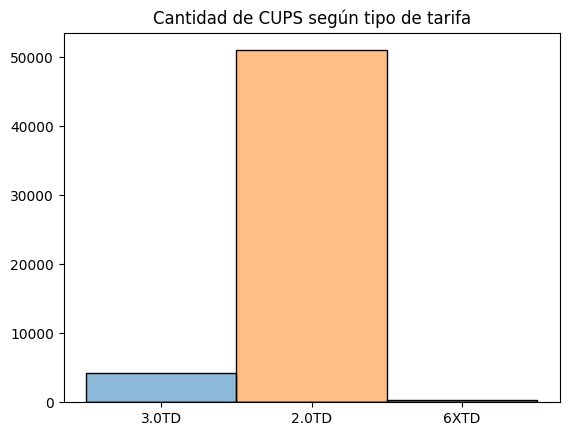

In [113]:
import seaborn as sns
sns.histplot(data= df, x = df['Tarifa'], hue = df['Tarifa'], legend = False)
plt.xticks(ticks = [0,1,2], labels = ['3.0TD','2.0TD','6XTD'])
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de CUPS según tipo de tarifa')

In [114]:
tar_cons = df.groupby(['Tarifa'])['Codigo Autoconsumo'].value_counts(normalize=True).unstack()*100

In [115]:
tar_cons

Codigo Autoconsumo,0,1
Tarifa,,
2,98.699184,1.300816
3,98.042025,1.957975
6,95.031056,4.968944


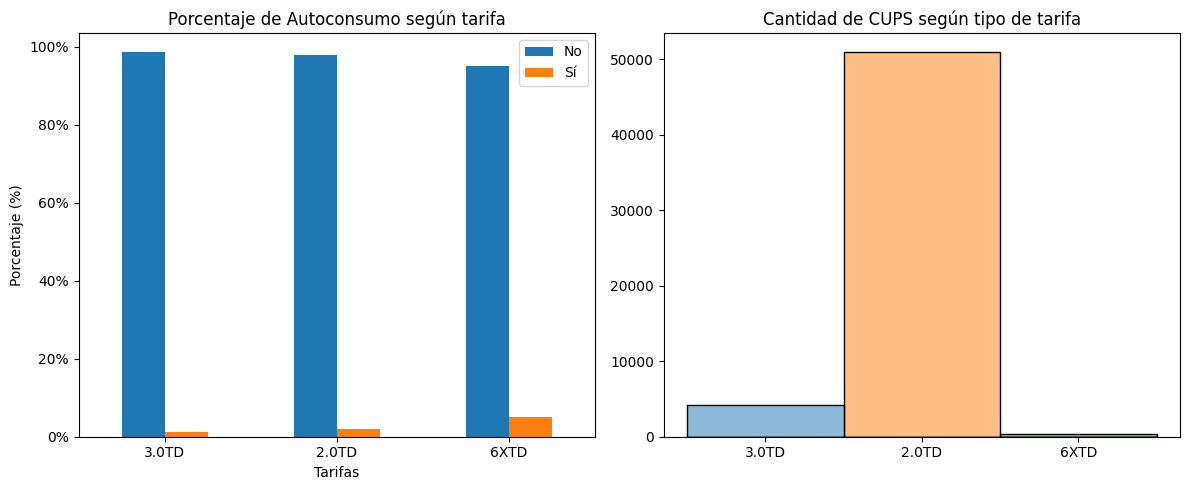

In [529]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot (bar plot)
ax1 = axes[0]
tar_cons.plot(kind='bar', ax=ax1, legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_ylabel('Porcentaje (%)')
ax1.set_xlabel('Tarifas')
ax1.set_xticks(ticks=[0., 1., 2.])
ax1.set_xticklabels(labels=['3.0TD', '2.0TD', '6XTD'])
ax1.set_title('Porcentaje de Autoconsumo según tarifa')
ax1.legend(labels=['No', 'Sí'])

# Second subplot (histogram)
ax2 = axes[1]
sns.histplot(data=df, x='Tarifa', hue='Tarifa', legend=False, ax=ax2)
ax2.set_xticks(ticks=[0, 1, 2])
ax2.set_xticklabels(labels=['3.0TD', '2.0TD', '6XTD'])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Cantidad de CUPS según tipo de tarifa')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


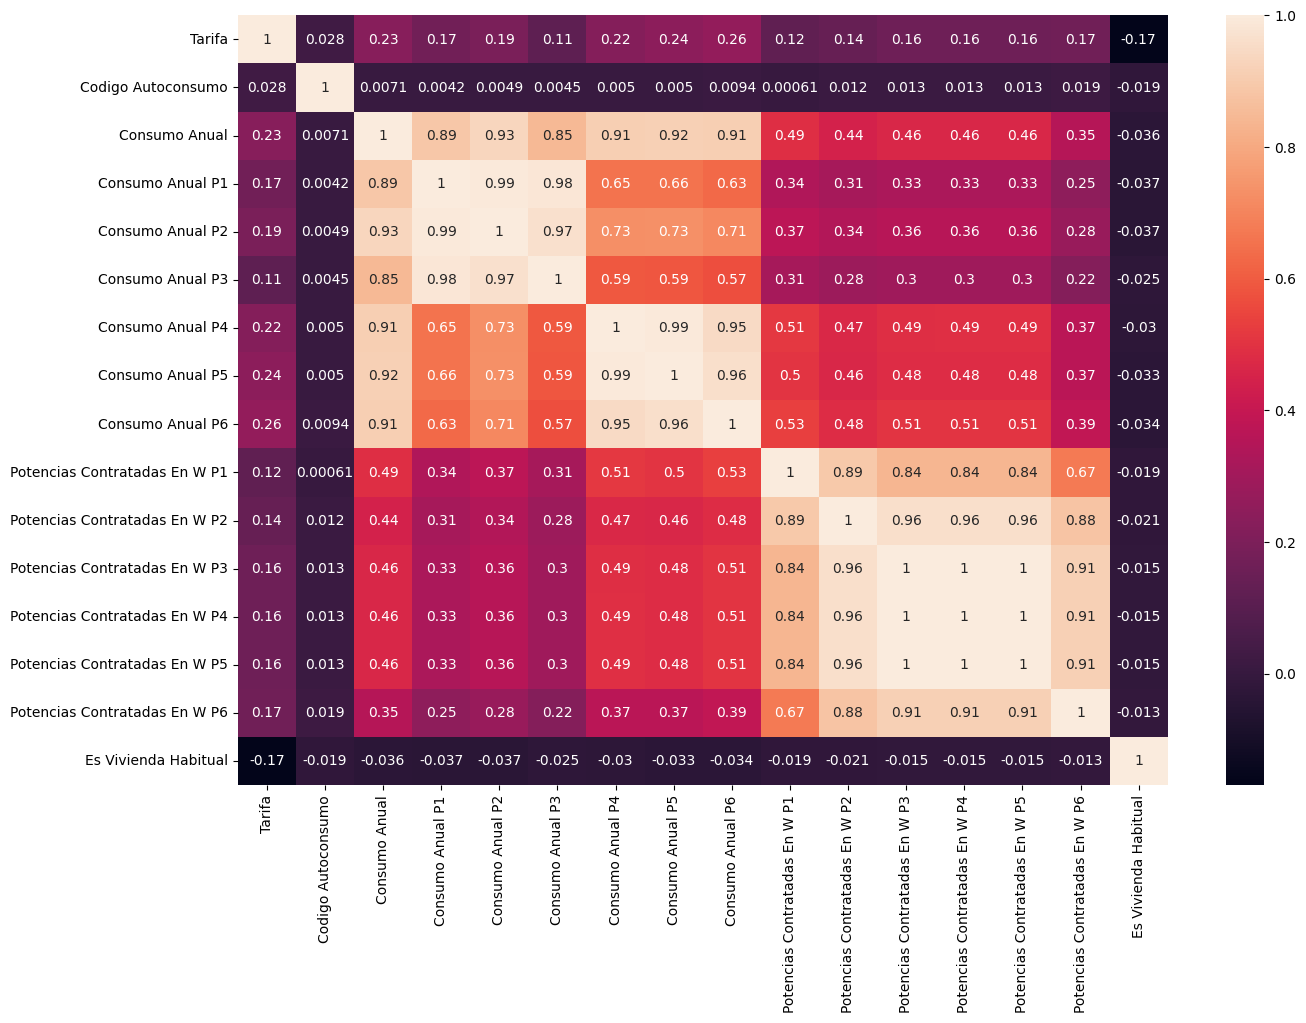

In [117]:
import seaborn as sns
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot=True);


# Machine Learning

Primero voy a ejecutar varios algoritmos y probar diferentes modelos con el dataframe sin procesar con el SMOTE y sin hacer un dummies sobre las tarifas.

In [315]:
X = df.drop(columns='Codigo Autoconsumo')
y = df['Codigo Autoconsumo']

In [316]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [92]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter


# # Use SMOTE to oversample the minority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Display class distribution before and after resampling
# print("Class distribution before SMOTE:", Counter(y))
# print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 54717, 1: 761})
Class distribution after SMOTE: Counter({0: 54717, 1: 54717})


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

## Random Forest

In [308]:
from sklearn.metrics import precision_score

In [309]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [311]:
y_pred = rfc.predict(X_test)

In [312]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.9870223503965393

In [313]:
cm_rfc0= confusion_matrix(y_test,y_pred)

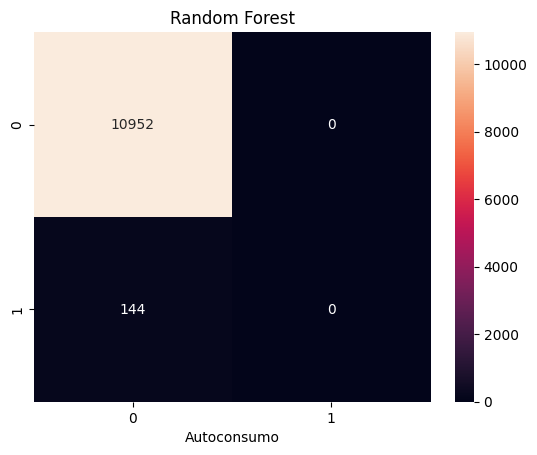

In [314]:
'''
Aquí podemos ver que el modelo identifica todas las filas como que NO tienen autoconsumo, aunque tengamos muy buen accuracy, es engañoso
pues lo que queremos es que identifique ambos casos lo mejor posible. No queremos esos Falsos Negativos.
'''

sns.heatmap(cm_rfc0, annot=True, fmt='d')

plt.title('Random Forest')
plt.xlabel('Autoconsumo')
plt.show()

## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [131]:
y_pred_lr = lr.predict(X_test)

In [132]:
from sklearn.metrics import classification_report


In [133]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10952
           1       0.00      0.00      0.00       144

    accuracy                           0.99     11096
   macro avg       0.49      0.50      0.50     11096
weighted avg       0.97      0.99      0.98     11096



In [134]:
accuracy_score(y_test,y_pred_lr)

0.9868421052631579

In [135]:
cm_lr00 = confusion_matrix(y_test,y_pred_lr)
cm_lr00

array([[10950,     2],
       [  144,     0]], dtype=int64)

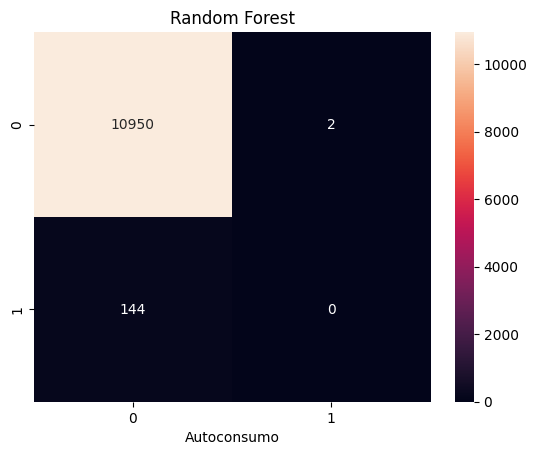

In [136]:
sns.heatmap(cm_lr00, annot=True, fmt='d')

plt.title('Random Forest')
plt.xlabel('Autoconsumo')
plt.show()

Prueba con ```class_weight = 'balanced'```

In [137]:
lr = LogisticRegression(max_iter=200,class_weight='balanced')
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test,y_pred_lr))
accuracy_score(y_test,y_pred_lr)


              precision    recall  f1-score   support

           0       0.99      0.61      0.75     10952
           1       0.01      0.44      0.03       144

    accuracy                           0.61     11096
   macro avg       0.50      0.52      0.39     11096
weighted avg       0.98      0.61      0.74     11096



0.606434751261716

In [138]:
cm_lr01 = confusion_matrix(y_test,y_pred_lr)

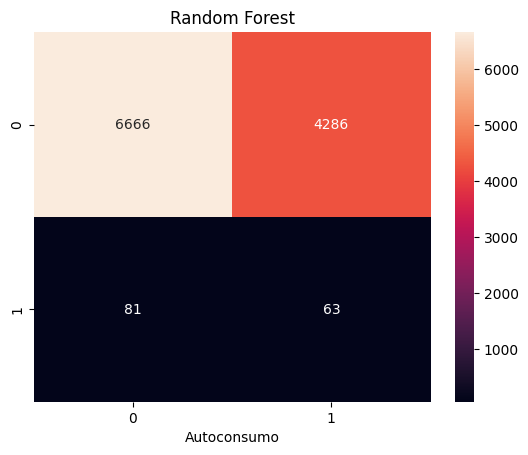

In [139]:
sns.heatmap(cm_lr01, annot=True, fmt='d')

plt.title('Random Forest')
plt.xlabel('Autoconsumo')
plt.show()

No he conseguido un resultado óptimo. Dando un peso balanceado al target, el resultado es bastante equilibrado (accuracy = 60%), pero no es suficiente.

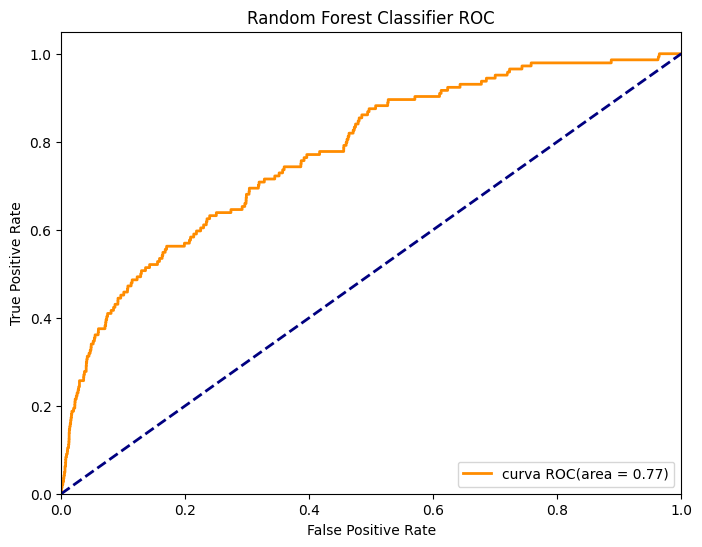

In [346]:
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for the positive class
y_scores = rfc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC')
plt.legend(loc="lower right")
plt.show()

# Support Vector Classifier

In [140]:
from sklearn.svm import SVC

In [141]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [142]:
y_pred_svc = svc.predict(X_test)

In [143]:
accuracy_score(y_test,y_pred_svc)


0.9870223503965393

In [144]:
confusion_matrix(y_test,y_pred_svc)

array([[10952,     0],
       [  144,     0]], dtype=int64)

Pruebo ahora el svc con class_weight, pues tengo el mismo problema que con el LR.

In [145]:
'''
Voy a probar un GrisSearch con el SVC, dado que tiene el parámetro class_weight = 'balanced', lo que nos permite darle más importancia
a las pocas filas de autoconsumo == 1.
Lo que quiero buscar es la mejor C, kernel y gamma.
'''
from sklearn.model_selection import GridSearchCV

In [146]:
svc = SVC(class_weight = 'balanced',random_state = 42)

In [147]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale']
}

In [148]:
# Create a grid search object
grid_search = GridSearchCV(svc, param_grid, cv=3)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.7913568563832184


In [149]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,17.964168,0.361776,5.448675,0.209397,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.594227,0.578951,0.595174,0.589451,0.007434,15
1,24.153293,0.338424,22.920009,0.591025,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.583345,0.599229,0.586116,0.589563,0.006928,14
2,17.876446,0.576451,5.444213,0.136738,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.594227,0.578951,0.595174,0.589451,0.007434,15
3,23.139649,0.692906,22.152971,0.629772,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.612005,0.673246,0.616669,0.633973,0.027835,11
4,18.105053,0.622214,5.510892,0.143119,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.594227,0.578951,0.595174,0.589451,0.007434,15
5,24.056772,0.807262,22.946276,0.546983,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.583480,0.596255,0.585372,0.588369,0.005630,18
6,18.692089,0.410797,5.458305,0.121828,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.601528,0.785792,0.608084,0.665135,0.085359,8
7,23.133197,0.656432,22.166024,0.564578,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.622279,0.599365,0.599229,0.606958,0.010834,13
8,18.637905,0.488130,5.457455,0.124149,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.601528,0.785792,0.608084,0.665135,0.085359,8
9,20.511406,0.567675,19.318504,0.344756,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.776261,0.785994,0.773354,0.778536,0.005405,2


In [150]:
# guardo en una variable el mejor resultado del SVC
gsv = grid_search.best_estimator_

In [151]:
y_pred_gsv= gsv.predict(X_test)

In [152]:
confusion_matrix(y_test,y_pred_gsv)

array([[8653, 2299],
       [  58,   86]], dtype=int64)

In [348]:
# Calculate predicted probabilities for the positive class
y_scores = gsv.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier ROC')
plt.legend(loc="lower right")
plt.show()

ValueError: X has 15 features, but SVC is expecting 14 features as input.

# LinearSVC

In [153]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight = 'balanced',random_state = 42,max_iter=1000)

In [154]:
lsvc.fit(X_train,y_train)

c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', random_state=42)

In [155]:
y_pred_lsvc = lsvc.predict(X_test)

In [156]:
accuracy_score(y_test,y_pred_lsvc)

0.6149062725306417

In [157]:
confusion_matrix(y_test,y_pred_lsvc)

array([[6761, 4191],
       [  82,   62]], dtype=int64)

In [185]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight = 'balanced',random_state = 42)
param_grid = {
    'dual' : [True,False],
    'penalty' : ['l1', 'l2'],
    'C': [0.1, 1.0, 10],
    
}
# Create a grid search object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242

Best Parameters: {'C': 10, 'dual': True, 'penalty': 'l2'}
Best Score: 0.961042740598403


c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [188]:
gs_lsvc = grid_search.best_estimator_
y_pred_gslsvc = gs_lsvc.predict(X_test)

In [191]:
cm_lsvc = confusion_matrix(y_test, y_pred_gslsvc)
cm_lsvc

array([[10651,   301],
       [  140,     4]], dtype=int64)

XGBoost

In [350]:
from xgboost import XGBClassifier

In [351]:
xgb = XGBClassifier(n_estimators = 1000,max_depth = 50,random_state=42)

In [352]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [353]:
y_pred_xgb = xgb.predict(X_test)

In [354]:
confusion_matrix(y_pred,y_pred_xgb)

array([[11072,    23],
       [    0,     1]], dtype=int64)

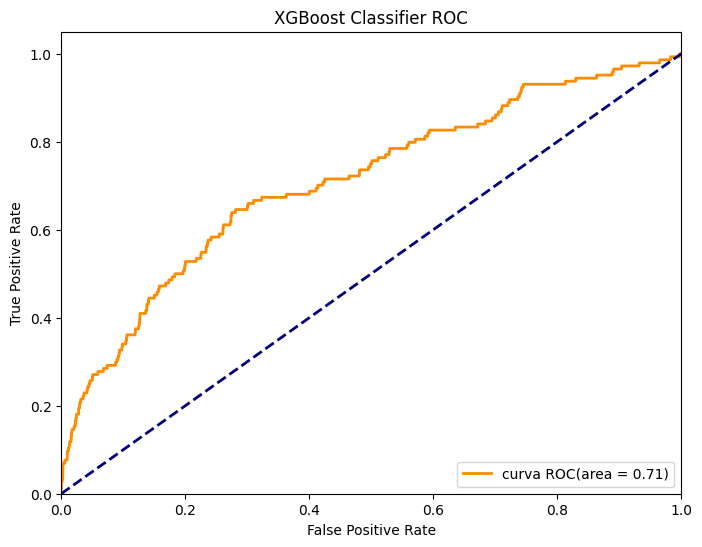

In [356]:
# Calculate predicted probabilities for the positive class
y_scores = xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

# KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

In [196]:
knn = KNeighborsClassifier(n_neighbors=3)


In [197]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [198]:
y_pred_knn = knn.predict(X_test)

In [199]:
accuracy_score(y_test,y_pred_knn)   

0.9858507570295602

In [200]:
confusion_matrix(y_test,y_pred_knn)

array([[10935,    17],
       [  140,     4]], dtype=int64)

KNN Grid Search

In [201]:
scores = []
lista = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 history = knn.fit(X_train,y_train)
 score = knn.score(X_test,y_test)
 scores.append(score)
 lista.append(i)


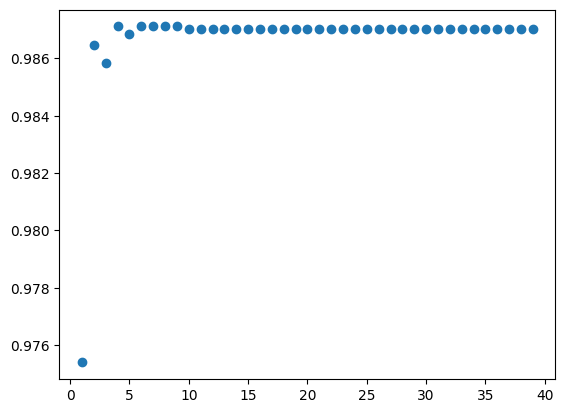

In [202]:
# Haz un plt.scatter de los rangos de k y sus scores
plt.scatter(x = range(1,40), y = scores);

In [203]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)   


0.9753965392934391

In [204]:
confusion_matrix(y_test,y_pred_knn)

array([[10809,   143],
       [  130,    14]], dtype=int64)

In [205]:
params = {
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'leaf_size' : [30,35,40,45]

}

In [206]:
knn = KNeighborsClassifier(n_neighbors = 1,n_jobs=-1)

# Create a grid search object
grid_search = GridSearchCV(knn, params)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'weights': 'uniform'}
Best Score: 0.9757784965963404


In [207]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'ball_tree', n_jobs=-1)

In [208]:
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)


In [339]:
print(accuracy_score(y_test,y_pred_knn))   
confusion_matrix(y_test,y_pred_knn)

0.9858507570295602


array([[10935,    17],
       [  140,     4]], dtype=int64)

In [340]:
cm_knn = confusion_matrix(y_test,y_pred_knn)

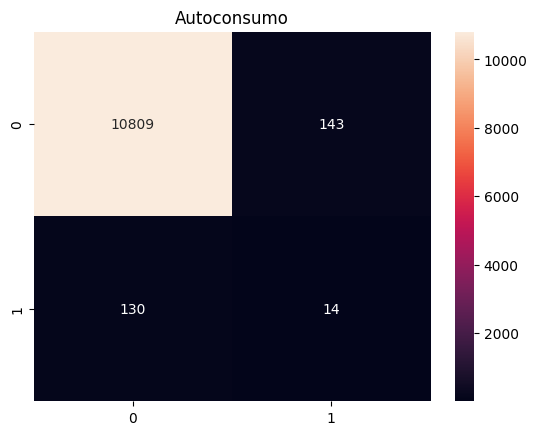

In [211]:

sns.heatmap(cm_knn, annot=True, fmt='d')

plt.title('KNN')
plt.show()

In [182]:
precision_score(y_test,y_pred_knn)

0.08917197452229299

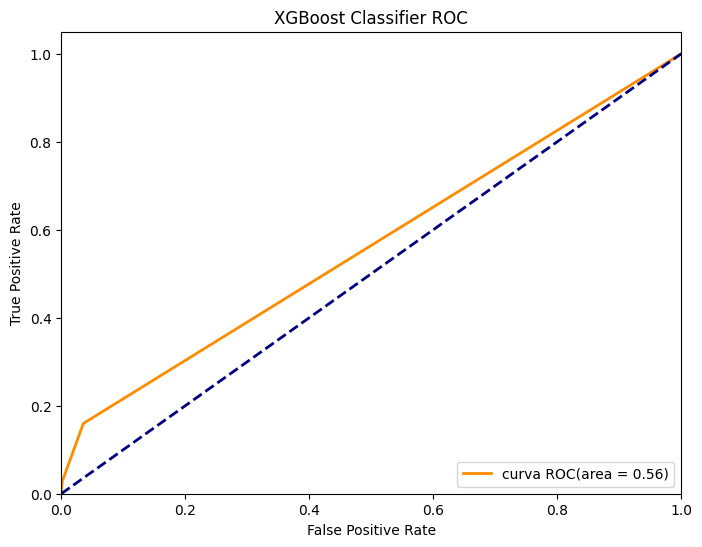

In [357]:
# Calculate predicted probabilities for the positive class
y_scores = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

In [153]:
# def fp_fn_extract(y_test,y_pred):

#     false_positives = []
#     false_negatives = []

#     for i in range(len(np.array(y_test))):
#         if np.array(y_test)[i] == 0 and y_pred[i] == 1:
#             false_positives.append(i)
#         elif np.array(y_test)[i] == 1 and y_pred[i] == 0:
#             false_negatives.append(i)

#     print("False Positives:", false_positives)
#     print("False Negatives:", false_negatives)

#     return false_positives, false_negatives

In [156]:
# fp_fn_knn = fp_fn_extract(y_test,y_pred_knn);

False Positives: [59, 72, 74, 86, 99, 160, 190, 193, 201, 213, 246, 253, 263, 271, 354, 414, 456, 469, 530, 542, 559, 597, 599, 621, 622, 643, 647, 650, 658, 665, 666, 667, 669, 707, 711, 722, 731, 783, 785, 847, 857, 926, 947, 1001, 1011, 1015, 1058, 1064, 1067, 1079, 1090, 1119, 1155, 1160, 1165, 1172, 1186, 1209, 1235, 1261, 1262, 1353, 1362, 1439, 1450, 1458, 1498, 1593, 1641, 1660, 1695, 1700, 1720, 1841, 1856, 1873, 1877, 1887, 1894, 1903, 1910, 1943, 1961, 1981, 2009, 2013, 2068, 2120, 2130, 2132, 2136, 2139, 2173, 2182, 2214, 2234, 2264, 2279, 2312, 2327, 2343, 2394, 2414, 2483, 2486, 2521, 2536, 2539, 2586, 2622, 2657, 2743, 2758, 2759, 2784, 2794, 2811, 2819, 2833, 2835, 2861, 2877, 2891, 2894, 2898, 2900, 2928, 2945, 2962, 3001, 3010, 3023, 3049, 3068, 3086, 3087, 3112, 3113, 3131, 3159, 3181, 3190, 3195, 3197, 3254, 3258, 3265, 3266, 3271, 3272, 3326, 3330, 3347, 3353, 3357, 3363, 3373, 3389, 3390, 3396, 3462, 3487, 3516, 3559, 3571, 3575, 3581, 3600, 3619, 3624, 3626, 3641

In [165]:
# df.iloc[np.r_[false_negatives],:]

,Tarifa,Codigo Autoconsumo,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Es Vivienda Habitual
119,2,0,1841,535,500,806,0,0,0,3.300,3.300,0.0,0.0,0.0,0.0,1
234,2,0,4297,1456,1131,1710,0,0,0,5.750,5.750,0.0,0.0,0.0,0.0,1
294,2,0,1867,545,458,864,0,0,0,4.400,4.400,0.0,0.0,0.0,0.0,1
385,2,0,5459,1375,1144,2940,0,0,0,4.600,4.600,0.0,0.0,0.0,0.0,1
595,2,0,16151,4111,3942,8099,0,0,0,10.392,10.392,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483,2,0,1683,419,422,842,0,0,0,3.300,3.300,0.0,0.0,0.0,0.0,0
21522,2,1,1062,213,333,516,0,0,0,3.450,3.450,0.0,0.0,0.0,0.0,1
21591,2,0,2199,614,697,888,0,0,0,4.000,4.000,0.0,0.0,0.0,0.0,1
21737,2,0,4000,887,929,2183,0,0,0,3.300,3.300,0.0,0.0,0.0,0.0,0


In [359]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(loss = 'exponential',n_estimators=100, random_state=42)



In [360]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', random_state=42)

In [361]:
y_pred_gb = gb.predict(X_test)

In [362]:
accuracy_score(y_test,y_pred_gb)

0.9870223503965393

In [363]:
confusion_matrix(y_test,y_pred_gb)

array([[10952,     0],
       [  144,     0]], dtype=int64)

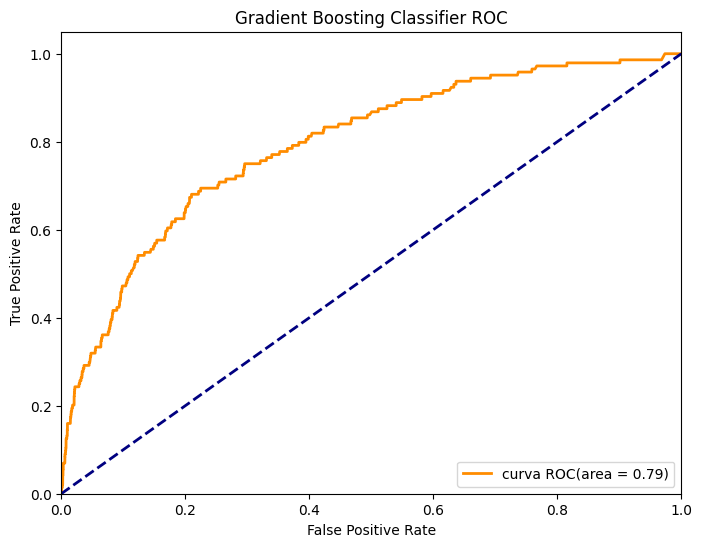

In [365]:
# Calculate predicted probabilities for the positive class
y_scores = gb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC')
plt.legend(loc="lower right")
plt.show()

# Random Forest + Ada Boost

In [318]:

from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(rfc, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, y_train)



AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   random_state=42)

In [319]:
# Make predictions on the test data
y_pred_ada = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9872025955299207


0.75


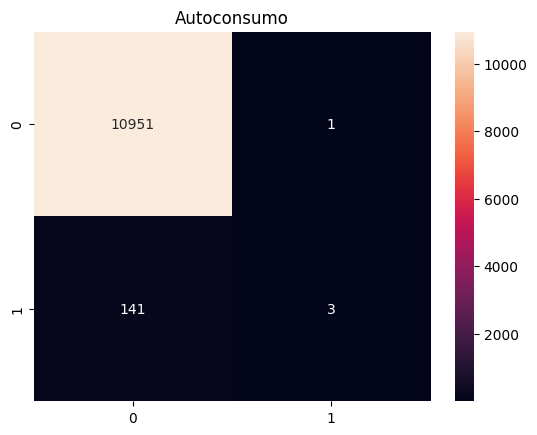

In [320]:
print(precision_score(y_test,y_pred_ada))   
confusion_matrix(y_test,y_pred_knn)
cm = confusion_matrix(y_test,y_pred_ada)

sns.heatmap(cm, annot=True, fmt='d')

plt.title('Autoconsumo')
plt.show()

In [321]:
scores = []
lista = []
# Will take some time
for i in range(10,100,10):
 
 ada = AdaBoostClassifier(rfc,n_estimators=i,random_state=42)
 history = ada.fit(X_train,y_train)
 score = ada.score(X_test,y_test)
 scores.append(score)
 lista.append(i)


In [327]:
feature_importances = history.feature_importances_


In [328]:
column_names = list(df.columns)
column_names.remove(column_names[1])

In [329]:
len(feature_importances),len(column_names)

(15, 15)

C:\Users\gaman\AppData\Local\Temp\ipykernel_5904\4238618633.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(column_names)
C:\Users\gaman\AppData\Local\Temp\ipykernel_5904\4238618633.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{val:.2f}' for val in plt.gca().get_xticks()])


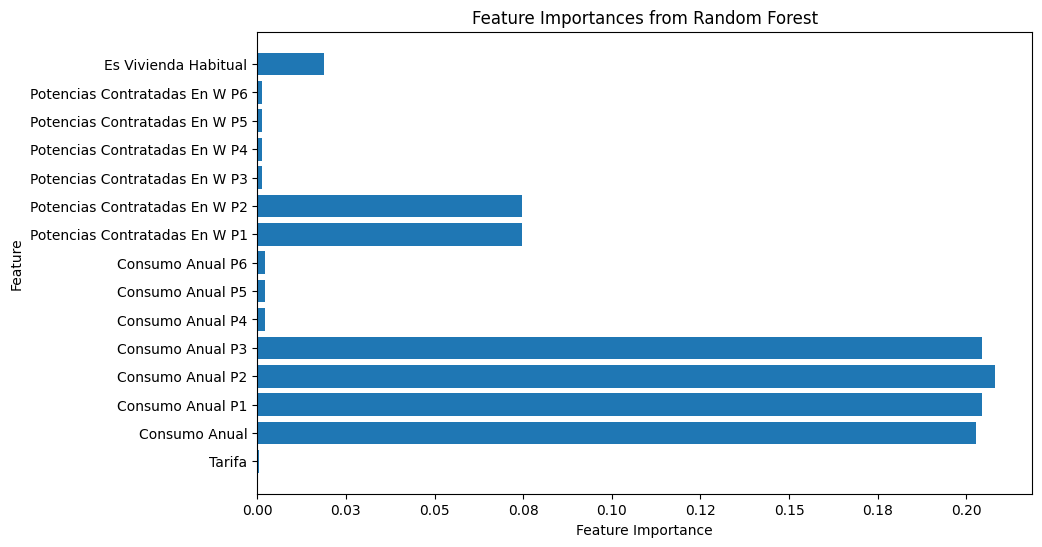

In [330]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Importance')
plt.gca().set_yticklabels(column_names)
plt.yticks(range(len(feature_importances)), column_names)
plt.gca().set_xticklabels([f'{val:.2f}' for val in plt.gca().get_xticks()])
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

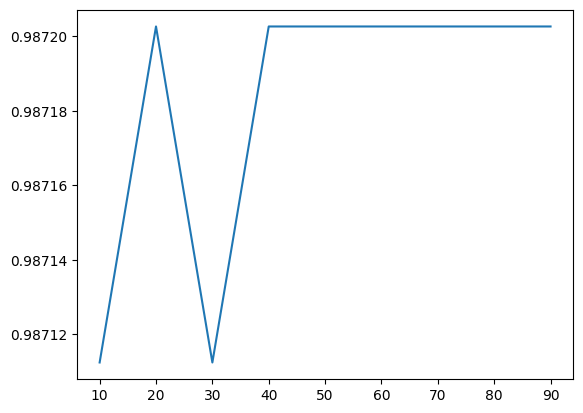

In [331]:

plt.plot(range(10,100,10),scores);


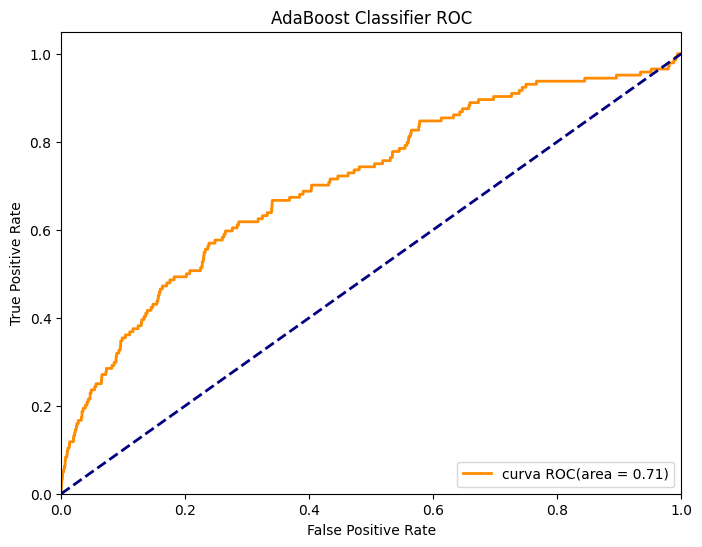

In [367]:
# Calculate predicted probabilities for the positive class
y_scores = ada.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

In [332]:
from sklearn.ensemble import VotingClassifier



# Create an ensemble of classifiers using VotingClassifier
ensemble_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('adaboost', adaboost)
], voting='hard')  # You can use 'soft' for weighted average probabilities or 'hard' for majority vote

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.99
Confusion Matrix:
[[10951     1]
 [  144     0]]


Hemos visto como ninguno de los algoritmos testeados está funcionando, por lo que buscaremos soluciones.
El problema principal es que, como he mostrado en el Feature engineering la columna de target está desproporcionada. Este desbalanceo implica que los algoritmos no sepan diferenciar cuando es 0 y cuando es 1. Resulta que tenemos un 95% de accuracy, pero todos los 1 son falsos negativos.

In [341]:
df['Codigo Autoconsumo'].value_counts()

Codigo Autoconsumo
0    54717
1      761
Name: count, dtype: int64

Para solucionar esto, voy a utilizar una tecnica de over-sampling conocida como SMOTE- Es una técnica utilizada en el procesamiento de conjuntos de datos desequilibrados en problemas de clasificación. Su objetivo principal es abordar el desequilibrio entre las clases en un conjunto de datos donde una clase minoritaria tiene una representación mucho menor que la clase mayoritaria.

# Prueba con SMOTE

In [425]:
# Use SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution before and after resampling
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

Class distribution before SMOTE: Counter({0: 54717, 1: 761})
Class distribution after SMOTE: Counter({0: 54717, 1: 54717})


Gracias al oversampling, ahora tenemos una muestra sintética y equilibrada del target.

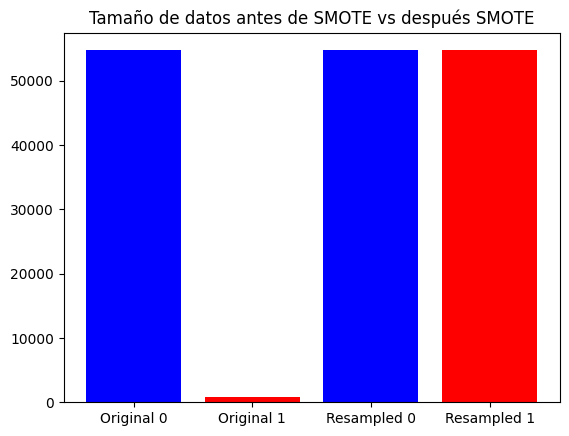

In [419]:

# Given lists
labels = ['Original 0', 'Original 1', 'Resampled 0', 'Resampled 1']
lengths = [len(np.array(y[y == 0])), len(np.array(y[y == 1])), len(np.array(y_resampled[y_resampled == 0])), len(np.array(y_resampled[y_resampled == 1]))]

# Create a bar plot
plt.bar(labels, lengths, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('')
plt.ylabel('')
plt.title('Tamaño de datos antes de SMOTE vs después SMOTE')
plt.show()

Voy a repetir los algoritmos anteriores.

## Random Forest

In [426]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [427]:
y_pred = rfc.predict(X_test)

In [428]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.8636633618129483

In [429]:
cm_rfc0= confusion_matrix(y_test,y_pred)

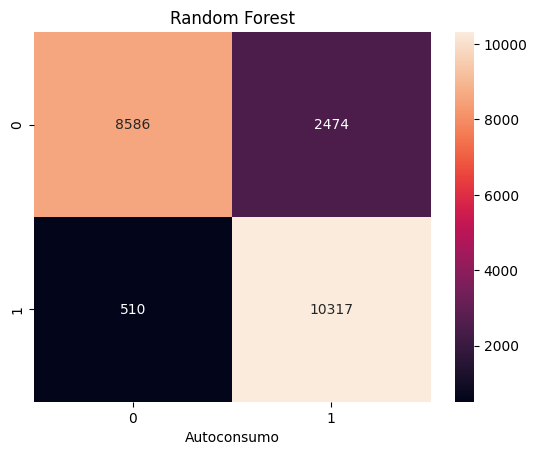

In [431]:
'''
Ya podemos apreciar los cambios en el algoritmo. Ahora está mucho más equilibrado y es más preciso, pero a costa de perder accuracy.
Ahora solo queda probar otros modelos que puedan dar mejor resultados, y afinar bien los parámetros para encontrar el mejor resultado.
'''

sns.heatmap(cm_rfc0, annot=True, fmt='d')

plt.title('Random Forest')
plt.xlabel('Autoconsumo')
plt.show()

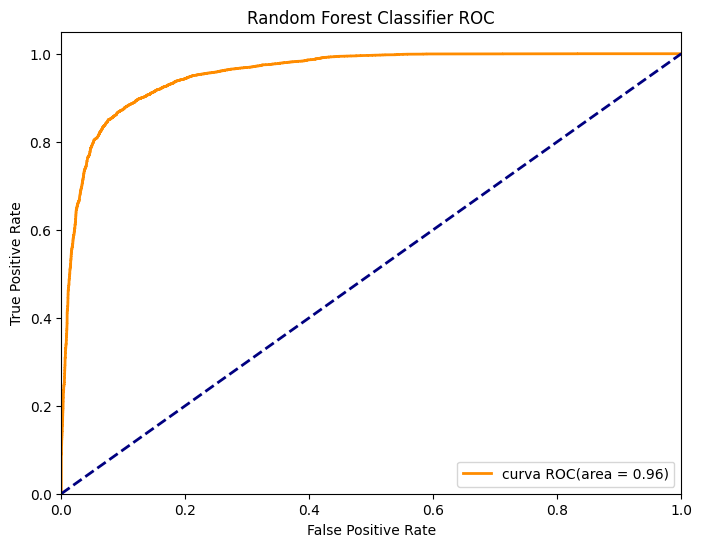

In [444]:
# Calculate predicted probabilities for the positive class
y_scores = rfc.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC')
plt.legend(loc="lower right")
plt.show()

Gracias a la curva ROC, podemos observar que aunque el accuracy sea menor, el algoritmo funciona mucho mejor, ya que su area está más cercana al 1 que al 0.5

## Logistic Regression

In [432]:
from sklearn.linear_model import LogisticRegression

In [433]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)

c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [434]:
y_pred_lr = lr.predict(X_test)

In [435]:
from sklearn.metrics import classification_report


In [436]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60     11060
           1       0.58      0.53      0.56     10827

    accuracy                           0.58     21887
   macro avg       0.58      0.58      0.58     21887
weighted avg       0.58      0.58      0.58     21887



In [437]:
accuracy_score(y_test,y_pred_lr)

0.5809384566180837

In [438]:
cm_lr00 = confusion_matrix(y_test,y_pred_lr)
cm_lr00

array([[6926, 4134],
       [5038, 5789]], dtype=int64)

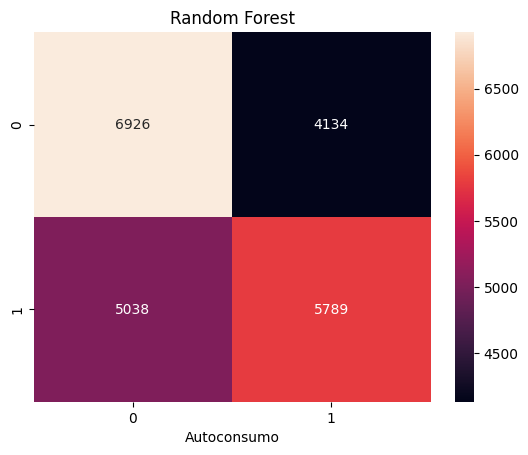

In [439]:
sns.heatmap(cm_lr00, annot=True, fmt='d')

plt.title('Random Forest')
plt.xlabel('Autoconsumo')
plt.show()

Prueba con ```class_weight = 'balanced'```

In [451]:
lr = LogisticRegression(max_iter=200,class_weight='balanced')
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test,y_pred_lr))
accuracy_score(y_test,y_pred_lr)


              precision    recall  f1-score   support

           0       0.58      0.63      0.60     11060
           1       0.59      0.53      0.56     10827

    accuracy                           0.58     21887
   macro avg       0.58      0.58      0.58     21887
weighted avg       0.58      0.58      0.58     21887



c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5823548224973729

In [452]:
cm_lr01 = confusion_matrix(y_test,y_pred_lr)

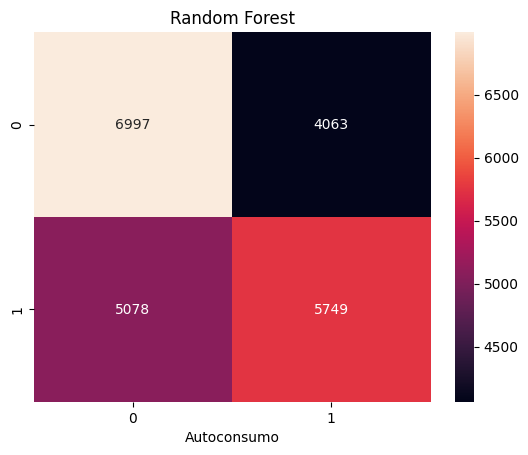

In [453]:
sns.heatmap(cm_lr01, annot=True, fmt='d')

plt.title('Random Forest')
plt.xlabel('Autoconsumo')
plt.show()

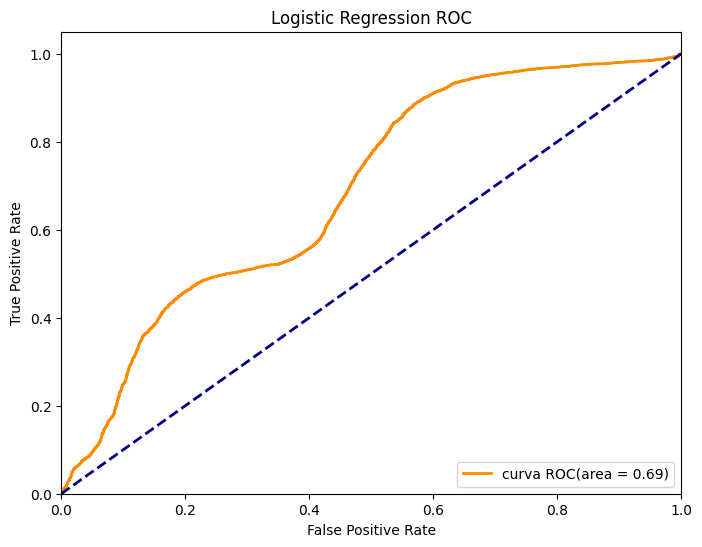

In [454]:
# Calculate predicted probabilities for the positive class
y_scores = lr.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

Definitivamente la Regresión Logística no me parece el mejor modelo para lo que estamos buscando, en ninguno de los casos ha dado buenos resultados, pero nos ha servido para ver que en función del peso los resultados mejoraban.

# Support Vector Classifier

In [461]:
from sklearn.svm import SVC

In [462]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [463]:
y_pred_svc = svc.predict(X_test)

In [464]:
accuracy_score(y_test,y_pred_svc)


0.6068899346644127

In [465]:
cm_svc = confusion_matrix(y_test,y_pred_svc)

Pruebo ahora el svc con class_weight, pues tengo el mismo problema que con el LR.
En este caso utilizaré los hiperparámetros del GridSearch que hice en los modelos anteriores.

In [466]:
svc = SVC(C = 10, kernel = 'rbf', gamma= 1,class_weight = 'balanced',random_state = 42)

In [474]:
svc.fit(X_train,y_train)

SVC(C=10, class_weight='balanced', gamma=1, random_state=42)

In [475]:
y_pred_svc2= svc.predict(X_test)

In [479]:
cm_svc2 = confusion_matrix(y_test,y_pred_svc2)
cm_svc2

array([[8667, 2393],
       [2683, 8144]], dtype=int64)

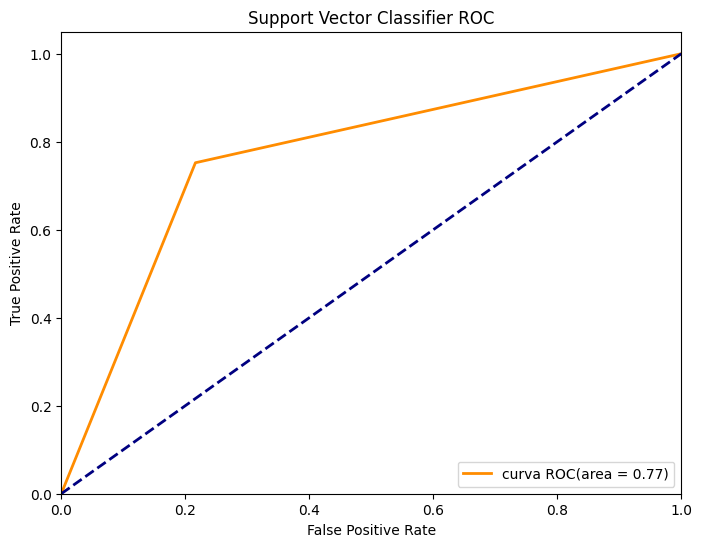

In [478]:
# Calculate predicted probabilities for the positive class
y_scores = svc.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier ROC')
plt.legend(loc="lower right")
plt.show()

# LinearSVC

In [468]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight = 'balanced',random_state = 42,max_iter=1000)

In [469]:
lsvc.fit(X_train,y_train)

c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', random_state=42)

In [470]:
y_pred_lsvc = lsvc.predict(X_test)

In [471]:
accuracy_score(y_test,y_pred_lsvc)

0.5736738703339882

In [480]:
cm_lsvc = confusion_matrix(y_test,y_pred_lsvc)
cm_lsvc

array([[6903, 4157],
       [5174, 5653]], dtype=int64)

Volvemos a hacer un GridSearch para averiguar cuales son los mejores hiperparámetros para el modelo

In [481]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight = 'balanced',random_state = 42)
param_grid = {
    'dual' : [True,False],
    'penalty' : ['l1', 'l2'],
    'C': [0.1, 1.0, 10],
    
}
# Create a grid search object
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242

Best Parameters: {'C': 10, 'dual': True, 'penalty': 'l2'}
Best Score: 0.6157723398448687


c:\Users\gaman\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [482]:
gs_lsvc = grid_search.best_estimator_
y_pred_gslsvc = gs_lsvc.predict(X_test)

In [483]:
cm_gs_lsvc = confusion_matrix(y_test, y_pred_gslsvc)
cm_gs_lsvc

array([[7940, 3120],
       [5079, 5748]], dtype=int64)

XGBoost

In [484]:
from xgboost import XGBClassifier

In [485]:
xgb = XGBClassifier(n_estimators = 1000,max_depth = 50,random_state=42)

In [486]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [487]:
y_pred_xgb = xgb.predict(X_test)

In [488]:
confusion_matrix(y_pred,y_pred_xgb)

array([[ 8582,   514],
       [ 2397, 10394]], dtype=int64)

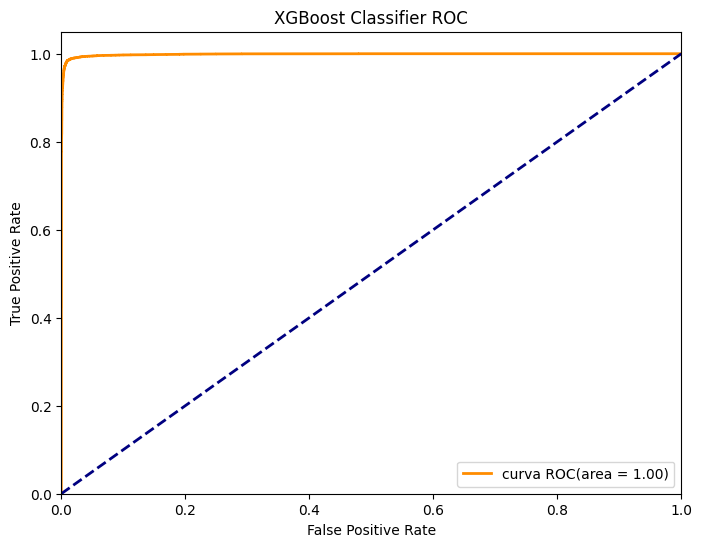

In [489]:
# Calculate predicted probabilities for the positive class
y_scores = xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

# KNN

In [490]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

KNN Grid Search

In [491]:
scores = []
lista = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 history = knn.fit(X_train,y_train)
 score = knn.score(X_test,y_test)
 scores.append(score)
 lista.append(i)


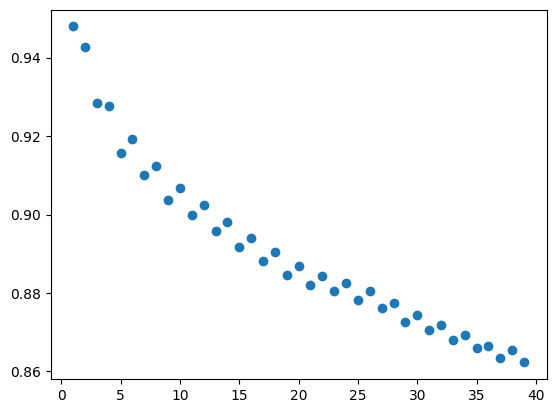

In [492]:
# Haz un plt.scatter de los rangos de k y sus scores
plt.scatter(x = range(1,40), y = scores);

In [493]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)   


0.947914287019692

In [494]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[10070,   990],
       [  150, 10677]], dtype=int64)

In [496]:
params = {
    'algorithm' : ['ball_tree', 'kd_tree'],
    'weights' : ['uniform', 'distance'],
}

In [497]:
knn = KNeighborsClassifier(n_neighbors = 1,n_jobs=-1)

# Create a grid search object
grid_search = GridSearchCV(knn, params)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'algorithm': 'ball_tree', 'weights': 'uniform'}
Best Score: 0.9420311127256117


In [498]:
gs_knn = grid_search.best_estimator_

In [499]:
gs_knn.fit(X_train,y_train)
y_pred_knn = gs_knn.predict(X_test)


In [500]:
print(accuracy_score(y_test,y_pred_knn))   
cm_gsknn = confusion_matrix(y_test,y_pred_knn)
cm_gsknn

0.947914287019692


array([[10070,   990],
       [  150, 10677]], dtype=int64)

In [501]:
cm_knn = confusion_matrix(y_test,y_pred_knn)

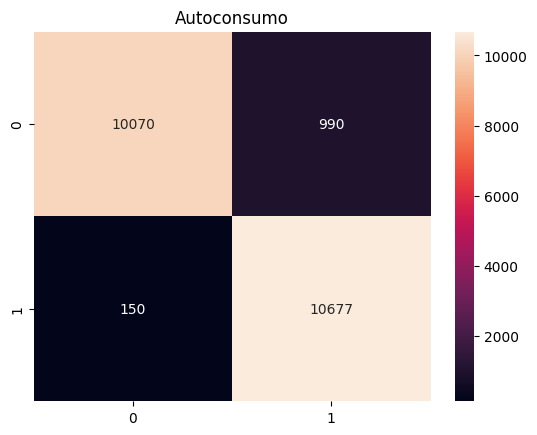

In [502]:

sns.heatmap(cm_knn, annot=True, fmt='d')

plt.title('Autoconsumo')
plt.show()

In [503]:
precision_score(y_test,y_pred_knn)

0.9151452815633839

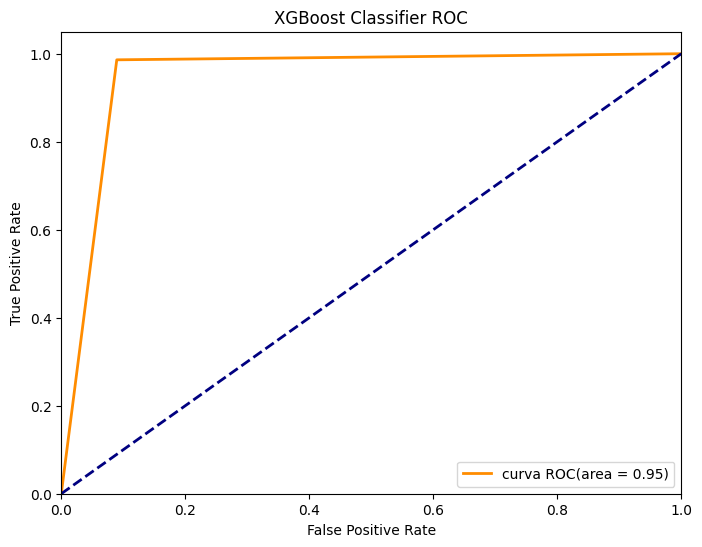

In [505]:
# Calculate predicted probabilities for the positive class
y_scores = gs_knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# def fp_fn_extract(y_test,y_pred):

#     false_positives = []
#     false_negatives = []

#     for i in range(len(np.array(y_test))):
#         if np.array(y_test)[i] == 0 and y_pred[i] == 1:
#             false_positives.append(i)
#         elif np.array(y_test)[i] == 1 and y_pred[i] == 0:
#             false_negatives.append(i)

#     print("False Positives:", false_positives)
#     print("False Negatives:", false_negatives)

#     return false_positives, false_negatives

In [ ]:
# fp_fn_knn = fp_fn_extract(y_test,y_pred_knn);

False Positives: [59, 72, 74, 86, 99, 160, 190, 193, 201, 213, 246, 253, 263, 271, 354, 414, 456, 469, 530, 542, 559, 597, 599, 621, 622, 643, 647, 650, 658, 665, 666, 667, 669, 707, 711, 722, 731, 783, 785, 847, 857, 926, 947, 1001, 1011, 1015, 1058, 1064, 1067, 1079, 1090, 1119, 1155, 1160, 1165, 1172, 1186, 1209, 1235, 1261, 1262, 1353, 1362, 1439, 1450, 1458, 1498, 1593, 1641, 1660, 1695, 1700, 1720, 1841, 1856, 1873, 1877, 1887, 1894, 1903, 1910, 1943, 1961, 1981, 2009, 2013, 2068, 2120, 2130, 2132, 2136, 2139, 2173, 2182, 2214, 2234, 2264, 2279, 2312, 2327, 2343, 2394, 2414, 2483, 2486, 2521, 2536, 2539, 2586, 2622, 2657, 2743, 2758, 2759, 2784, 2794, 2811, 2819, 2833, 2835, 2861, 2877, 2891, 2894, 2898, 2900, 2928, 2945, 2962, 3001, 3010, 3023, 3049, 3068, 3086, 3087, 3112, 3113, 3131, 3159, 3181, 3190, 3195, 3197, 3254, 3258, 3265, 3266, 3271, 3272, 3326, 3330, 3347, 3353, 3357, 3363, 3373, 3389, 3390, 3396, 3462, 3487, 3516, 3559, 3571, 3575, 3581, 3600, 3619, 3624, 3626, 3641

In [ ]:
# df.iloc[np.r_[false_negatives],:]

,Tarifa,Codigo Autoconsumo,Consumo Anual,Consumo Anual P1,Consumo Anual P2,Consumo Anual P3,Consumo Anual P4,Consumo Anual P5,Consumo Anual P6,Potencias Contratadas En W P1,Potencias Contratadas En W P2,Potencias Contratadas En W P3,Potencias Contratadas En W P4,Potencias Contratadas En W P5,Potencias Contratadas En W P6,Es Vivienda Habitual
119,2,0,1841,535,500,806,0,0,0,3.300,3.300,0.0,0.0,0.0,0.0,1
234,2,0,4297,1456,1131,1710,0,0,0,5.750,5.750,0.0,0.0,0.0,0.0,1
294,2,0,1867,545,458,864,0,0,0,4.400,4.400,0.0,0.0,0.0,0.0,1
385,2,0,5459,1375,1144,2940,0,0,0,4.600,4.600,0.0,0.0,0.0,0.0,1
595,2,0,16151,4111,3942,8099,0,0,0,10.392,10.392,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483,2,0,1683,419,422,842,0,0,0,3.300,3.300,0.0,0.0,0.0,0.0,0
21522,2,1,1062,213,333,516,0,0,0,3.450,3.450,0.0,0.0,0.0,0.0,1
21591,2,0,2199,614,697,888,0,0,0,4.000,4.000,0.0,0.0,0.0,0.0,1
21737,2,0,4000,887,929,2183,0,0,0,3.300,3.300,0.0,0.0,0.0,0.0,0


In [506]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(loss = 'exponential',n_estimators=100, random_state=42)



In [507]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', random_state=42)

In [508]:
y_pred_gb = gb.predict(X_test)

In [509]:
accuracy_score(y_test,y_pred_gb)

0.8491798784666698

In [510]:
confusion_matrix(y_test,y_pred_gb)

array([[8864, 2196],
       [1105, 9722]], dtype=int64)

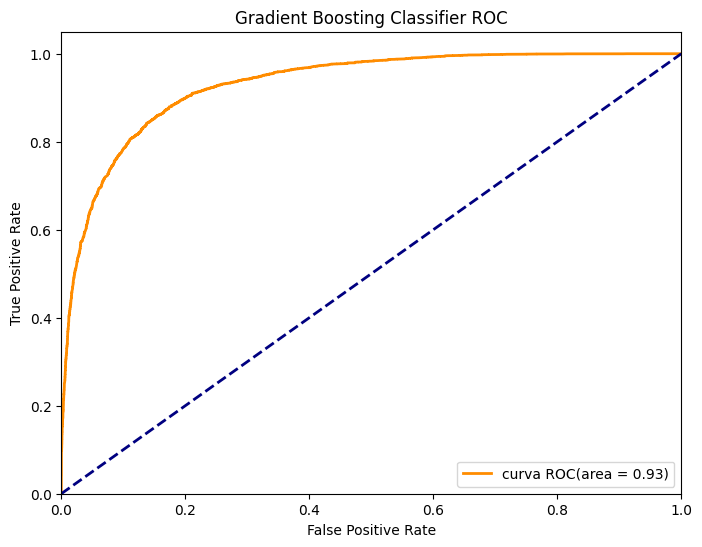

In [511]:
# Calculate predicted probabilities for the positive class
y_scores = gb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC')
plt.legend(loc="lower right")
plt.show()

# Random Forest + Ada Boost

In [512]:

from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(rfc, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, y_train)



AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   random_state=42)

In [513]:
# Make predictions on the test data
y_pred_ada = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9841458399963449


0.9783640679203944


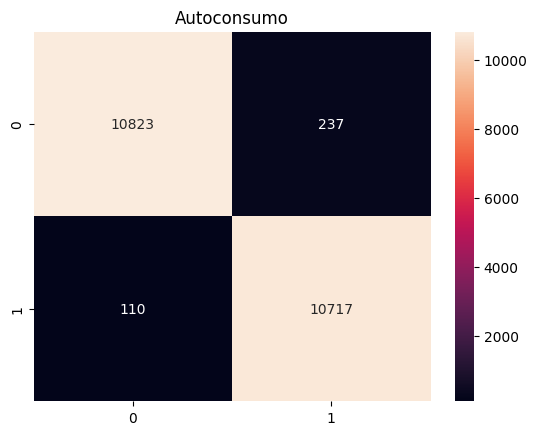

In [514]:
print(precision_score(y_test,y_pred_ada))   
confusion_matrix(y_test,y_pred_knn)
cm = confusion_matrix(y_test,y_pred_ada)

sns.heatmap(cm, annot=True, fmt='d')

plt.title('Autoconsumo')
plt.show()

In [515]:
scores = []
lista = []
# Will take some time
for i in range(10,100,10):
 
 ada = AdaBoostClassifier(rfc,n_estimators=i,random_state=42)
 history = ada.fit(X_train,y_train)
 score = ada.score(X_test,y_test)
 scores.append(score)
 lista.append(i)


In [516]:
feature_importances = history.feature_importances_


In [517]:
column_names = list(df.columns)
column_names.remove(column_names[1])

In [518]:
len(feature_importances),len(column_names)

(15, 15)

C:\Users\gaman\AppData\Local\Temp\ipykernel_5904\4238618633.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(column_names)
C:\Users\gaman\AppData\Local\Temp\ipykernel_5904\4238618633.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{val:.2f}' for val in plt.gca().get_xticks()])


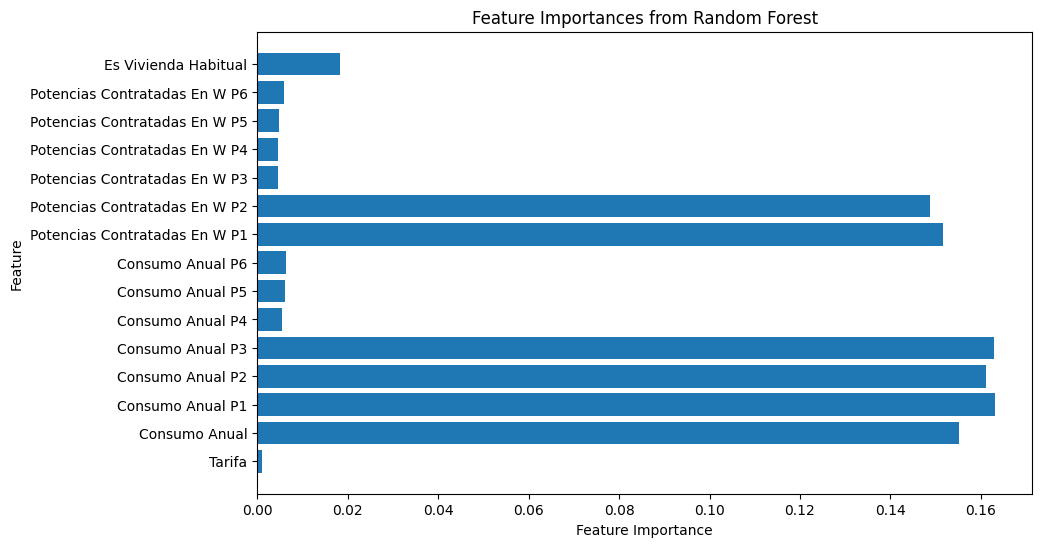

In [519]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Importance')
plt.gca().set_yticklabels(column_names)
plt.yticks(range(len(feature_importances)), column_names)
plt.gca().set_xticklabels([f'{val:.2f}' for val in plt.gca().get_xticks()])
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

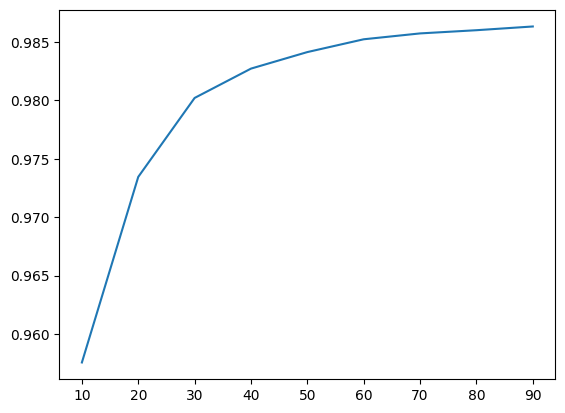

In [520]:

plt.plot(range(10,100,10),scores);


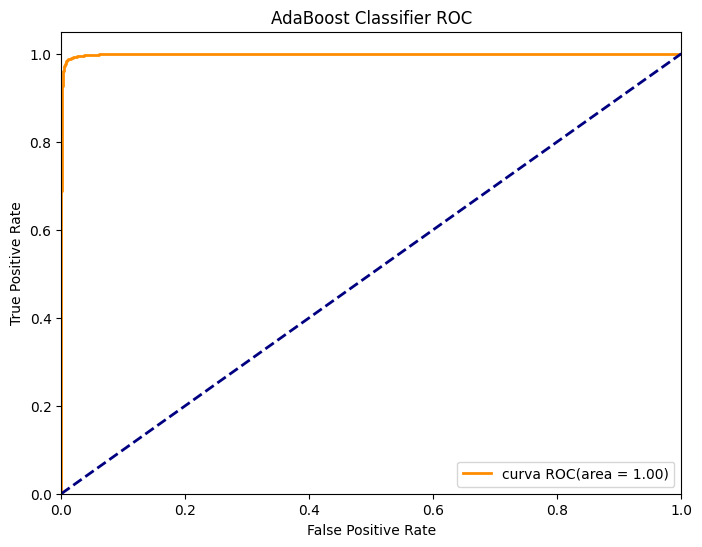

In [521]:
# Calculate predicted probabilities for the positive class
y_scores = ada.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

In [522]:
from sklearn.ensemble import VotingClassifier



# Create an ensemble of classifiers using VotingClassifier
ensemble_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('adaboost', adaboost)
], voting='hard')  # You can use 'soft' for weighted average probabilities or 'hard' for majority vote

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.98
Confusion Matrix:
[[10948   112]
 [  242 10585]]


# DEEP LEARNING

In [368]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [369]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

model.add(Dense(64, activation='relu'))    
model.add(Dropout(0.2))

model.add(Dense(32, activation='sigmoid'))    
model.add(Dropout(0.2))kt

model.add(Dense(16, activation='relu'))    

model.add(Dense(32, activation='sigmoid'))    
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))    
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))

In [370]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy','mse'])

In [371]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=2)

# Evaluate the model on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/20
347/347 - 2s - loss: 0.1036 - accuracy: 0.9719 - mse: 0.3811 - 2s/epoch - 5ms/step
Epoch 2/20
347/347 - 1s - loss: 0.0769 - accuracy: 0.9861 - mse: 0.3844 - 861ms/epoch - 2ms/step
Epoch 3/20
347/347 - 1s - loss: 0.0759 - accuracy: 0.9861 - mse: 0.3748 - 850ms/epoch - 2ms/step
Epoch 4/20
347/347 - 1s - loss: 0.0758 - accuracy: 0.9861 - mse: 0.3699 - 853ms/epoch - 2ms/step
Epoch 5/20
347/347 - 1s - loss: 0.0751 - accuracy: 0.9861 - mse: 0.3647 - 866ms/epoch - 2ms/step
Epoch 6/20
347/347 - 1s - loss: 0.0755 - accuracy: 0.9861 - mse: 0.3570 - 884ms/epoch - 3ms/step
Epoch 7/20
347/347 - 1s - loss: 0.0752 - accuracy: 0.9861 - mse: 0.3570 - 847ms/epoch - 2ms/step
Epoch 8/20
347/347 - 1s - loss: 0.0754 - accuracy: 0.9861 - mse: 0.3607 - 829ms/epoch - 2ms/step
Epoch 9/20
347/347 - 1s - loss: 0.0744 - accuracy: 0.9861 - mse: 0.3566 - 830ms/epoch - 2ms/step
Epoch 10/20
347/347 - 1s - loss: 0.0737 - accuracy: 0.9861 - mse: 0.3616 - 827ms/epoch - 2ms/step
Epoch 11/20
347/347 - 1s - loss:

In [372]:
confusion_matrix(y_test,y_pred)

array([[10952,     0],
       [  144,     0]], dtype=int64)

Con Deep Learning he estado probando diferentes combinaciones de capas y activaciones, pero el mejor resultado obtenido fue este.

# Prueba con diferente Feature Engineering

In [536]:

dums = pd.get_dummies(df['Tarifa'],dtype= int).rename(columns = {'2':'Tarifa_2.0','3':'Tarifa_3.0','6':'Tarifa_6.X'})
df_dum = pd.concat([df,dums], axis=1).drop(columns='Tarifa')

X = df_dum.drop(columns='Codigo Autoconsumo',axis=1)
y = df_dum['Codigo Autoconsumo']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)


In [537]:


# Use SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution before and after resampling
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

Class distribution before SMOTE: Counter({0: 54717, 1: 761})
Class distribution after SMOTE: Counter({0: 54717, 1: 54717})


In [538]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)


In [539]:
print(accuracy_score(y_test,y_pred_knn))
confusion_matrix(y_test,y_pred_knn)

0.9284049892630328


array([[ 9676,  1384],
       [  183, 10644]], dtype=int64)

# Random Forest + Ada Boost

In [540]:

from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(rfc, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, y_train)



AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   random_state=42)

In [541]:
# Make predictions on the test data
y_pred_ada = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9853794489879837


0.9800785890523622


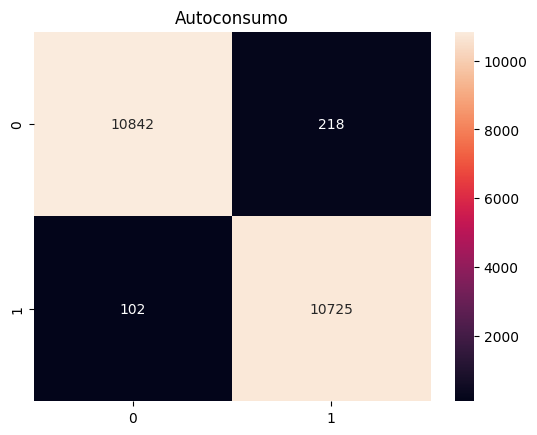

In [542]:
print(precision_score(y_test,y_pred_ada))   
confusion_matrix(y_test,y_pred_knn)
cm = confusion_matrix(y_test,y_pred_ada)

sns.heatmap(cm, annot=True, fmt='d')

plt.title('Autoconsumo')
plt.show()

In [543]:
scores = []
lista = []
# Will take some time
for i in range(10,100,10):
 
 ada = AdaBoostClassifier(rfc,n_estimators=i,random_state=42)
 history = ada.fit(X_train,y_train)
 score = ada.score(X_test,y_test)
 scores.append(score)
 lista.append(i)


In [544]:
feature_importances = history.feature_importances_


In [545]:
column_names = list(df.columns)
column_names.remove(column_names[1])

In [546]:
len(feature_importances),len(column_names)

(17, 15)

C:\Users\gaman\AppData\Local\Temp\ipykernel_5904\4238618633.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(column_names)


ValueError: The number of FixedLocator locations (17), usually from a call to set_ticks, does not match the number of labels (15).

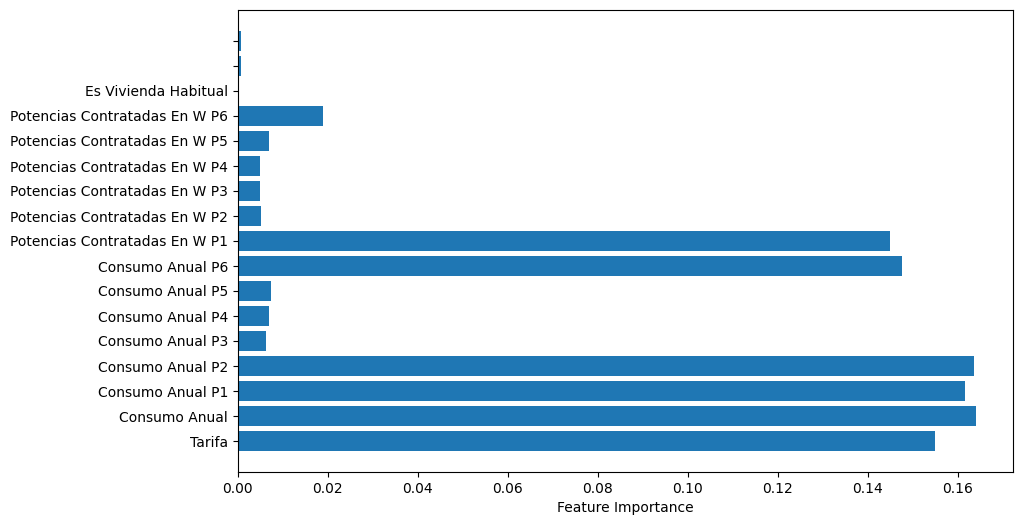

In [547]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Importance')
plt.gca().set_yticklabels(column_names)
plt.yticks(range(len(feature_importances)), column_names)
plt.gca().set_xticklabels([f'{val:.2f}' for val in plt.gca().get_xticks()])
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

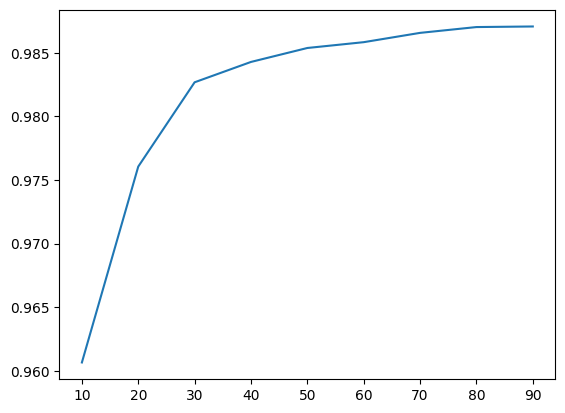

In [548]:

plt.plot(range(10,100,10),scores);


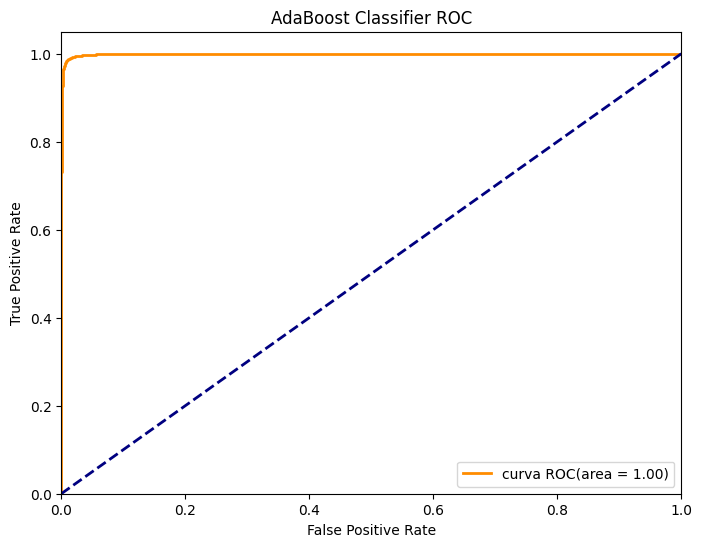

In [549]:
# Calculate predicted probabilities for the positive class
y_scores = ada.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC')
plt.legend(loc="lower right")
plt.show()

In [550]:
from sklearn.ensemble import VotingClassifier



# Create an ensemble of classifiers using VotingClassifier
ensemble_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('adaboost', adaboost)
], voting='hard')  # You can use 'soft' for weighted average probabilities or 'hard' for majority vote

# Fit the ensemble classifier on the training data
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ensemble_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.98
Confusion Matrix:
[[10918   142]
 [  273 10554]]
